In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

anime = pd.read_csv('anime_with_genre_separated.csv')
users = pd.read_csv('users_cleaned_with_location.csv')
anime_list = pd.read_csv('animelists_cleaned.csv')

In [2]:
AL = anime_list.drop(['my_start_date','my_finish_date','my_status','my_rewatching','my_rewatching_ep','my_last_updated','my_tags'], axis=1)

## Initial exploration questions
- Top genres (by location, by popularity, age bucket)
- Popularity: Most popular studios, genres, sources, 
- Distribution of age, gender, scores, user episodes watched, planning
- Scatter plots: Heat maps: genre x countries, genre x popularity, popularity x score, age x genre

In [3]:
anime = anime.drop(columns='Unnamed: 0')
anime2 = anime.set_index('anime_id')
anime2.columns

Index(['title', 'title_english', 'title_japanese', 'title_synonyms',
       'image_url', 'type', 'source', 'episodes', 'status', 'airing',
       'aired_string', 'aired', 'duration', 'rating', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year',
       'Ecchi', 'Police', 'Shoujo Ai', 'Josei', 'Fantasy', 'Action',
       'Martial Arts', 'Military', 'Slice of Life', 'Harem', 'Music', 'Drama',
       'Hentai', 'Yaoi', 'Supernatural', 'Thriller', 'Romance', 'Shoujo',
       'Parody', 'Adventure', 'Magic', 'Psychological', 'School', 'Samurai',
       'Historical', 'Sports', 'Vampire', 'Yuri', 'Super Power', 'Space',
       'Comedy', 'Shounen Ai', 'Dementia', 'Demons', 'Game', 'Sci-Fi',
       'Shounen', 'Seinen', 'Horror', 'Cars', 'Kids', 'Mystery', 'Mecha'],
      dtype='object')

In [4]:
genre_list = ['Ecchi', 'Police', 'Shoujo Ai', 'Josei', 'Fantasy',
       'Action', 'Martial Arts', 'Military', 'Slice of Life', 'Harem', 'Music',
       'Drama', 'Hentai', 'Yaoi', 'Supernatural', 'Thriller', 'Romance',
       'Shoujo', 'Parody', 'Adventure', 'Magic', 'Psychological', 'School',
       'Samurai', 'Historical', 'Sports', 'Vampire', 'Yuri', 'Super Power',
       'Space', 'Comedy', 'Shounen Ai', 'Dementia', 'Demons', 'Game', 'Sci-Fi',
       'Shounen', 'Seinen', 'Horror', 'Cars', 'Kids', 'Mystery', 'Mecha']

### Top Genres
- Comedy
- Action
- Fantasy
- Adventure 
- Drama 
- Sci-fi
- Shounen: a genre of Japanese comics and animated films aimed primarily at a young male audience, typically characterized by action-filled plots. Usually based around a male protagonist who has adventures, making friends along the way. Shounen meaning Teenage Boy. 
- Romance
- School
- Slice of Life
- Supernatural



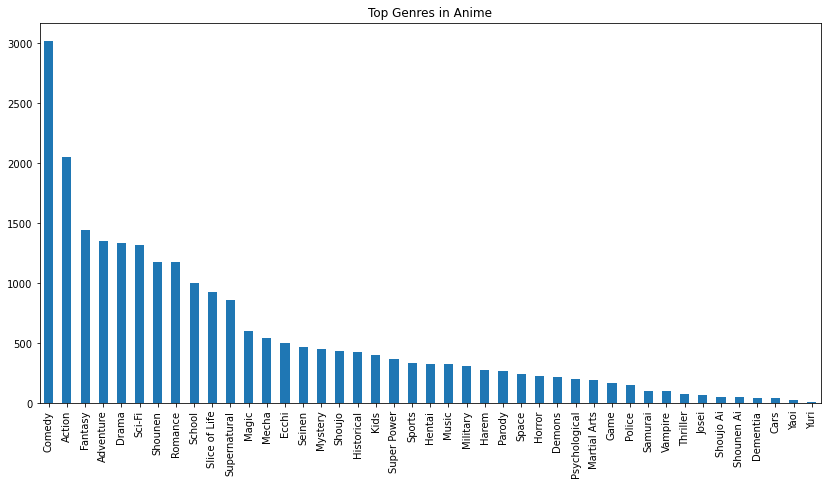

In [5]:
anime[genre_list].sum().sort_values(ascending=False).plot(kind='bar', figsize=(14,7), title= 'Top Genres in Anime')

### Top Locations

In [6]:
users.country.value_counts().head(30)

united states     19707
poland             4852
brazil             4087
canada             3926
philippines        2854
germany            2567
russia             2531
australia          2385
indonesia          2189
france             1872
portugal           1760
netherlands        1728
united kingdom     1659
sweden             1567
spain              1136
italy              1126
romania            1124
finland            1077
norway             1040
japan               931
india               910
chile               854
mexico              834
turkey              825
malaysia            807
hungary             797
bulgaria            774
singapore           725
belgium             683
lithuania           633
Name: country, dtype: int64

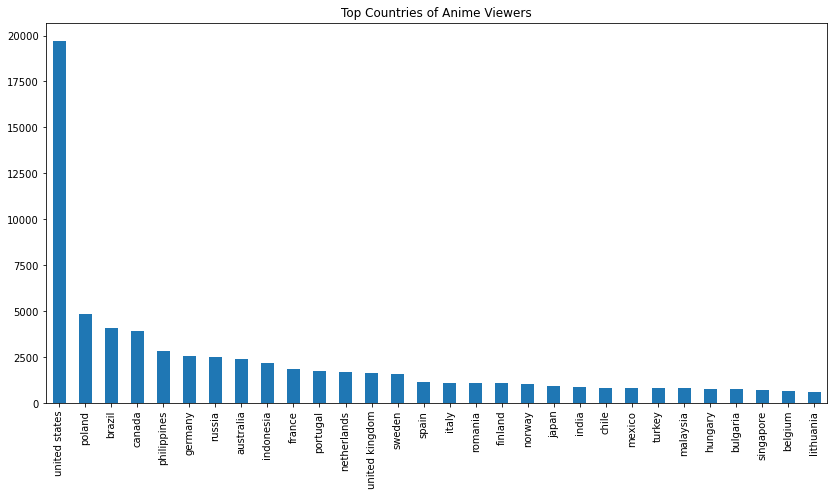

In [7]:
users.country.value_counts().head(30).plot(kind='bar', title= 'Top Countries of Anime Viewers', figsize=(14,7))

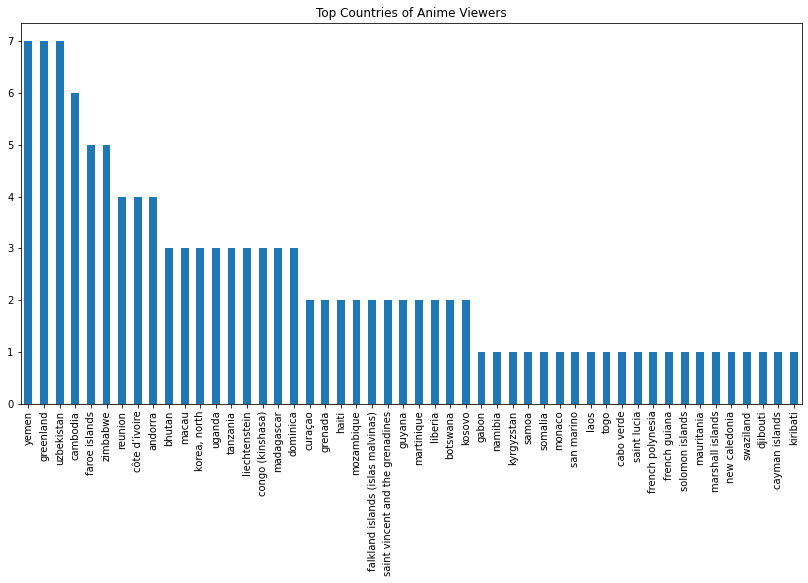

In [8]:
users.country.value_counts().tail(50).plot(kind='bar', title= 'Top Countries of Anime Viewers', figsize=(14,7))

In [9]:
anime.groupby('source').agg({'popularity': ['mean', 'median', 'min', 'max','count', ],'score':['mean', 'median', 'min', 'max','count']})

popularity                                 score         \
                       mean   median   min    max count      mean median   
source                                                                     
4-koma manga    4070.520619   3126.0    80  13186   194  6.884381  6.945   
Book            6472.244444   6231.0   740  13423    45  6.846889  6.820   
Card game       5214.326087   5053.0   591  11656    46  6.721087  6.760   
Digital manga   3571.285714   3109.0  1018   6323     7  5.610000  4.870   
Game            4671.688679   4019.5   107  14429   424  6.619717  6.670   
Light novel     1953.689453   1389.0     3  12491   512  7.245527  7.290   
Manga           3775.852387   2953.0     1  13949  2493  7.122367  7.190   
Music           7964.927273   7481.0   256  14002    55  6.069636  5.940   
Novel           5218.698582   4699.5    26  13864   282  6.994504  6.960   
Original        5678.167691   4923.0     7  14468  1789  6.544148  6.700   
Other           6471.017647   5612.0   283  14041   170  6.196882  6.270   
Picture book   10604.150943  11688.0  2283  14066    53  5.738302  5.830   
Radio           6483.600000   5564.0  5197  10404     5  6.080000  6.160   
Visual novel    3905.773859   4043.0     8  10117   482  6.734627  6.710   
Web manga       4362.675676   3414.0     5  13776   111  6.816396  6.840   

                                 
                min   max count  
source                           
4-koma manga   3.51  8.34   194  
Book           5.15  8.05    45  
Card game      5.39  7.64    46  
Digital manga  4.78  7.19     7  
Game           0.00  8.13   424  
Light novel    4.10  9.02   512  
Manga          3.44  9.25  2493  
Music          3.67  8.41    55  
Novel          4.00  9.11   282  
Original       0.00  9.19  1789  
Other          3.60  9.52   170  
Picture book   2.33  8.08    53  
Radio          5.31  6.72     5  
Visual novel   2.33  9.15   482  
Web manga      3.69  8.91   111

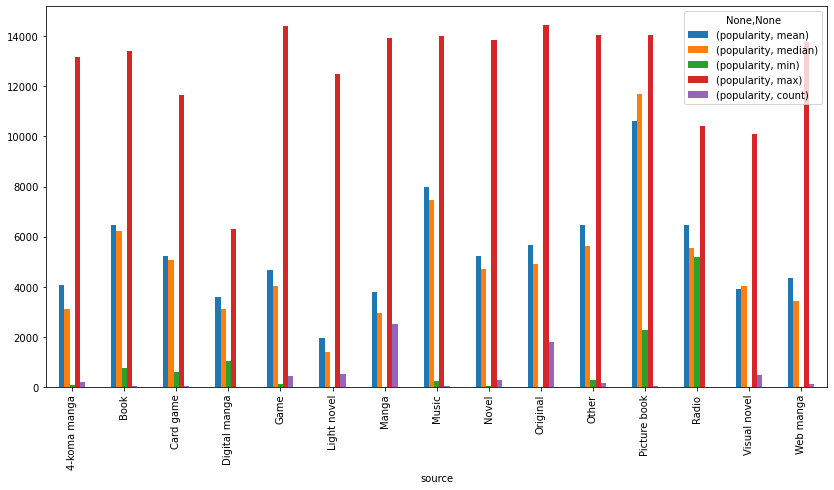

In [10]:
anime.groupby('source').agg({'popularity': ['mean', 'median','min', 'max','count']}).plot(kind='bar', figsize=(14,7))

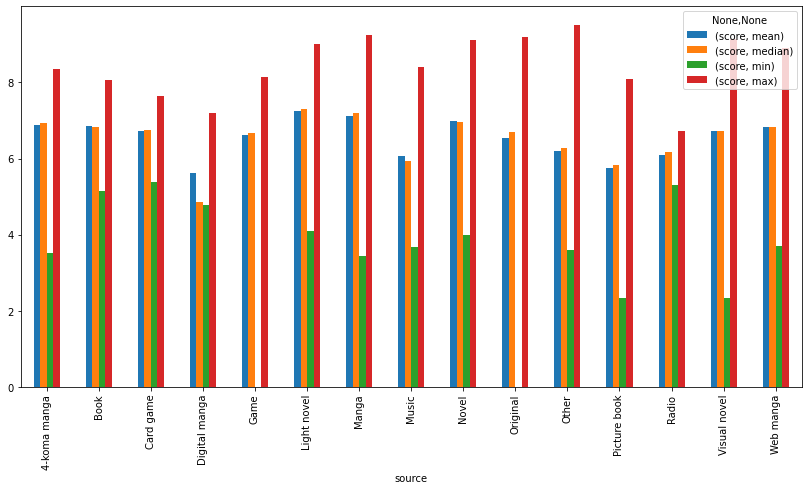

In [11]:
anime.groupby('source').agg({'score':['mean','median', 'min', 'max']}).plot(kind='bar', figsize=(14,7))

In [12]:
anime.groupby('type').agg({'popularity': ['mean', 'min', 'max','count'],'score':['mean', 'min', 'max','count']})

popularity                       score                  
                mean  min    max count      mean   min   max count
type                                                              
Movie    4606.513216   33  14427   908  7.100837  0.00  9.19   908
Music    8584.918367  508  14241    98  5.965510  2.89  8.41    98
ONA      7641.801471  424  14263   408  6.066544  0.00  8.46   408
OVA      4884.782156  105  14468  1345  6.694379  0.00  9.52  1345
Special  5209.904198  328  14429   929  6.714618  0.00  8.64   929
TV       3462.244295    1  13899  2980  7.020124  2.33  9.25  2980

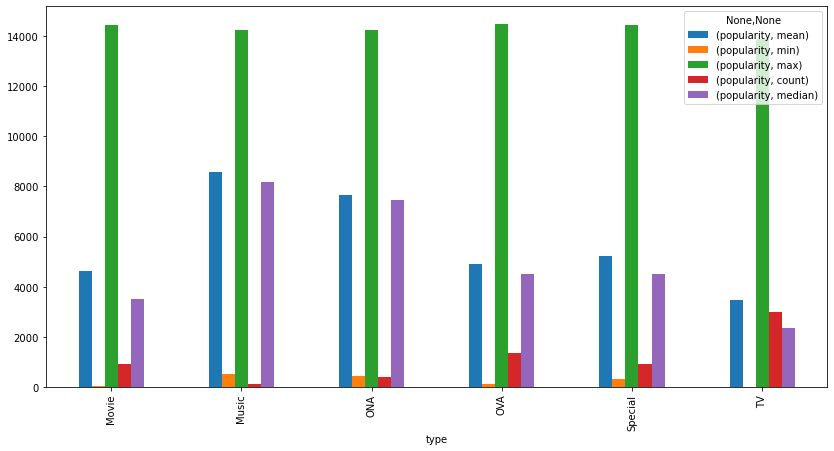

In [13]:
anime.groupby('type').agg({'popularity': ['mean', 'min', 'max','count', 'median']}).plot(kind='bar', figsize=(14,7))

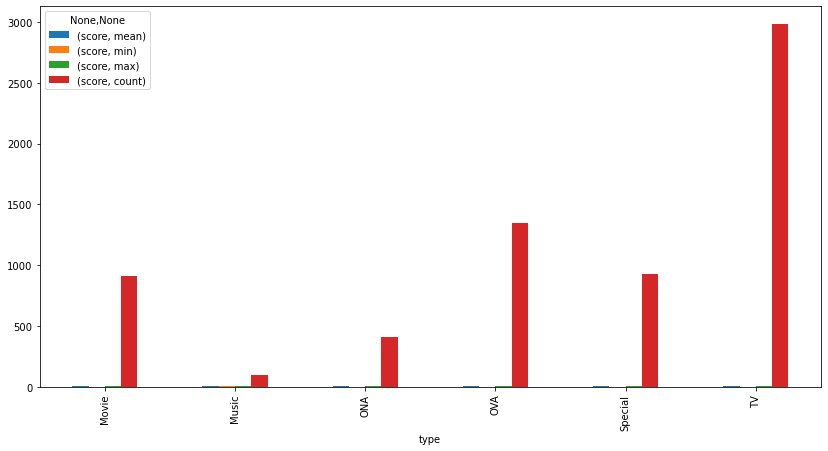

In [14]:
anime.groupby('type').agg({'score':['mean', 'min', 'max','count']}).plot(kind='bar', figsize=(14,7))

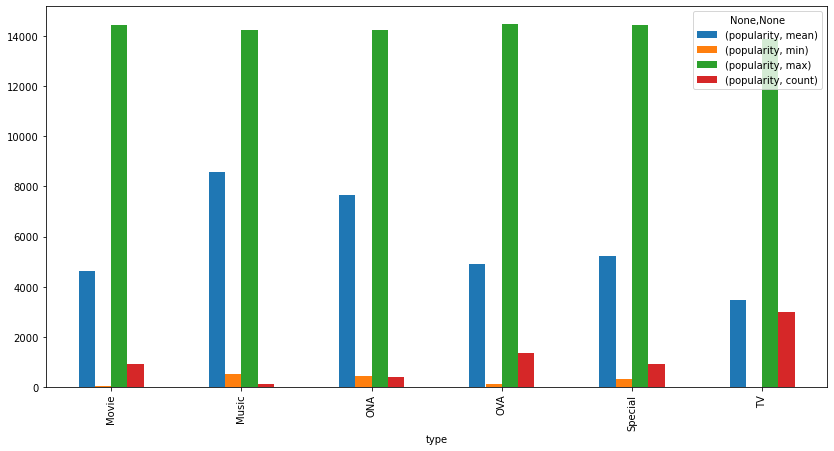

In [15]:
anime.groupby('type').agg({'popularity': ['mean', 'min', 'max','count']}).plot(kind='bar', figsize=(14,7))

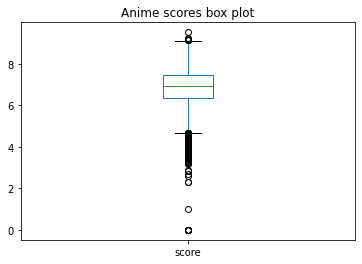

In [16]:
anime[['score']].plot(kind='box', title='Anime scores box plot')

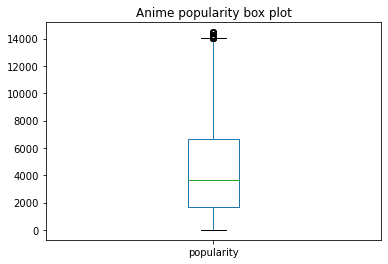

In [17]:
anime[['popularity']].plot(kind='box', title='Anime popularity box plot')

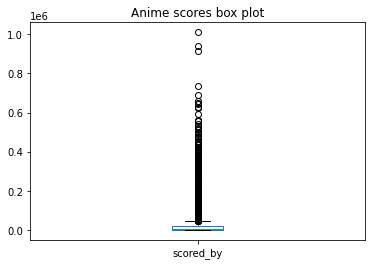

In [18]:
anime[['scored_by']].plot(kind='box', title='Anime scores box plot')

## Describe columns (summary statistics)

In [19]:
anime.score.describe()

count    6668.000000
mean        6.848998
std         0.927448
min         0.000000
25%         6.350000
50%         6.930000
75%         7.460000
max         9.520000
Name: score, dtype: float64

In [20]:
anime.popularity.describe()

count     6668.000000
mean      4479.515897
std       3453.338080
min          1.000000
25%       1691.750000
50%       3629.500000
75%       6630.250000
max      14468.000000
Name: popularity, dtype: float64

In [21]:
#og_anime = pd.read_csv('../data/anime_cleaned.csv')


In [22]:
anime.scored_by.describe()

count    6.668000e+03
mean     2.403501e+04
std      6.112103e+04
min      0.000000e+00
25%      6.812500e+02
50%      3.966000e+03
75%      1.976075e+04
max      1.009477e+06
Name: scored_by, dtype: float64

In [23]:
anime.type.describe()

count     6668
unique       6
top         TV
freq      2980
Name: type, dtype: object

In [24]:
anime.source.describe()

count      6668
unique       15
top       Manga
freq       2493
Name: source, dtype: object

In [25]:
anime.licensor.describe()

count           2787
unique           179
top       Funimation
freq             668
Name: licensor, dtype: object

In [26]:
anime.groupby('licensor').agg({'popularity': ['mean', 'min', 'max','count'],'score':['mean', 'min', 'max','count']})

popularity              \
                                                           mean   min   max   
licensor                                                                      
4Kids Entertainment                                 2934.769231   343  4854   
4Kids Entertainment, Discotek Media                 1871.000000  1871  1871   
4Kids Entertainment, Flatiron Film Company          1200.000000   417  2339   
4Kids Entertainment, Miramax Films                  2387.571429  1096  4171   
4Kids Entertainment, The Pokemon Company Intern...  2940.000000  2940  2940   
...                                                         ...   ...   ...   
Walt Disney Studios                                  591.400000    89  1125   
Walt Disney Studios, GKIDS                           776.000000    39  2590   
Warner Bros.                                        2168.000000  1514  2717   
bilibili                                            3648.000000  3648  3648   
feel.                                               1049.000000  1049  1049   

                                                             score        \
                                                   count      mean   min   
licensor                                                                   
4Kids Entertainment                                   13  6.956154  6.45   
4Kids Entertainment, Discotek Media                    1  6.520000  6.52   
4Kids Entertainment, Flatiron Film Company             3  7.343333  7.23   
4Kids Entertainment, Miramax Films                     7  6.881429  6.59   
4Kids Entertainment, The Pokemon Company Intern...     1  6.570000  6.57   
...                                                  ...       ...   ...   
Walt Disney Studios                                    5  8.010000  7.13   
Walt Disney Studios, GKIDS                            10  8.150000  7.32   
Warner Bros.                                           5  7.004000  6.37   
bilibili                                               1  7.070000  7.07   
feel.                                                  1  8.190000  8.19   

                                                                
                                                     max count  
licensor                                                        
4Kids Entertainment                                 7.83    13  
4Kids Entertainment, Discotek Media                 6.52     1  
4Kids Entertainment, Flatiron Film Company          7.57     3  
4Kids Entertainment, Miramax Films                  7.29     7  
4Kids Entertainment, The Pokemon Company Intern...  6.57     1  
...                                                  ...   ...  
Walt Disney Studios                                 8.73     5  
Walt Disney Studios, GKIDS                          8.92    10  
Warner Bros.                                        7.32     5  
bilibili                                            7.07     1  
feel.                                               8.19     1  

[179 rows x 8 columns]

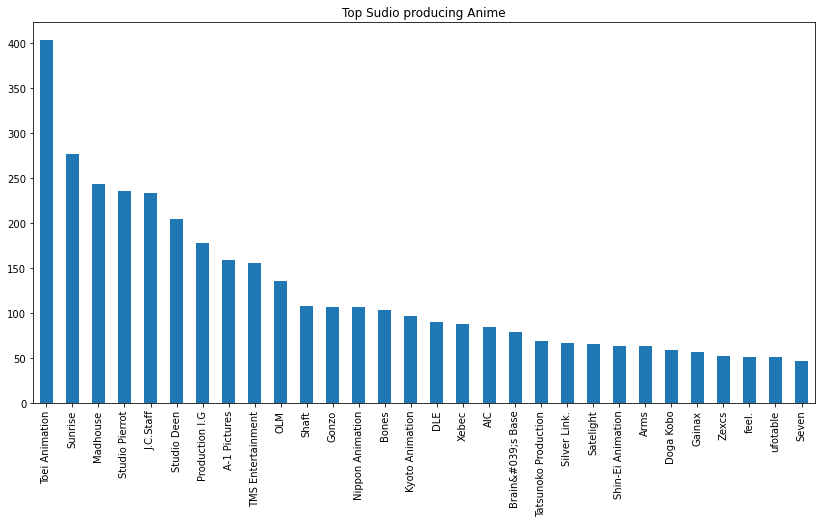

In [27]:
anime.studio.value_counts().head(30).plot(kind='bar', title= 'Top Sudio producing Anime', figsize=(14,7))

In [28]:
anime.groupby('studio').agg({'popularity': ['mean', 'min', 'max','count'],'score':['mean', 'min', 'max','count']})

popularity                         score  \
                                       mean    min    max count      mean   
studio                                                                      
10Gauge                         9918.500000   5141  13886     4  5.525000   
2:10 Animation                  8773.000000   6297  10168     3  4.176667   
8bit                            2041.096774    167   6199    31  7.093871   
A-1 Pictures                    2490.163522      3  13287   159  7.253270   
A-1 Pictures, Bridge            1789.500000    120   3459     2  7.755000   
...                                     ...    ...    ...   ...       ...   
pH Studio                      13819.800000  13320  14074     5  4.456000   
pH Studio, D &amp; D Pictures  14130.000000  14130  14130     1  6.000000   
production doA                  2430.000000   1404   3456     2  6.990000   
ufotable                        2677.666667     43  10348    51  7.274510   
ufotable, feel., Studio Flag    2379.000000   2379   2379     1  6.990000   

                                                 
                                min   max count  
studio                                           
10Gauge                        4.33  6.66     4  
2:10 Animation                 0.00  7.26     3  
8bit                           5.90  8.04    31  
A-1 Pictures                   4.60  8.88   159  
A-1 Pictures, Bridge           7.38  8.13     2  
...                             ...   ...   ...  
pH Studio                      3.67  6.06     5  
pH Studio, D &amp; D Pictures  6.00  6.00     1  
production doA                 6.47  7.51     2  
ufotable                       3.90  8.66    51  
ufotable, feel., Studio Flag   6.99  6.99     1  

[711 rows x 8 columns]

In [29]:
anime.groupby('studio')['score', 'popularity'].mean().sort_values(by= 'score', ascending=False).head(30)

<ipython-input-29-6b477108d3c6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  anime.groupby('studio')['score', 'popularity'].mean().sort_values(by= 'score', ascending=False).head(30)


,score,popularity
studio,,
"Artland, Magic Bus",9.110000,671.000000
Studio Chizu,8.635000,315.000000
"J.C.Staff, Egg Firm",8.615000,949.500000
"Madhouse, Satelight, Graphinica",8.530000,105.000000
"Xebec, AIC",8.460000,1282.000000
"Tezuka Productions, MAPPA",8.440000,390.000000
"Studio Ghibli, Studio Hibari",8.380000,373.500000
"Gainax, Tatsunoko Production",8.320000,48.000000
"Studio Gallop, Studio Comet",8.280000,745.000000


In [30]:
anime.groupby('studio')['score'].agg(['mean', 'min', 'max','count']).sort_values(by='mean', ascending=False).head(30)

,mean,min,max,count
studio,,,,
"Artland, Magic Bus",9.110000,9.11,9.11,1
Studio Chizu,8.635000,8.50,8.77,2
"J.C.Staff, Egg Firm",8.615000,8.56,8.67,2
"Madhouse, Satelight, Graphinica",8.530000,8.53,8.53,1
"Xebec, AIC",8.460000,8.46,8.46,1
"Tezuka Productions, MAPPA",8.440000,8.44,8.44,1
"Studio Ghibli, Studio Hibari",8.380000,8.29,8.47,2
"Gainax, Tatsunoko Production",8.320000,8.32,8.32,1
"Studio Gallop, Studio Comet",8.280000,8.28,8.28,1


In [31]:
anime.groupby('studio')['score'].agg(['mean', 'min', 'max','count', 'std']).sort_values(by='count', ascending=False).head(30)

,mean,min,max,count,std
studio,,,,,
Toei Animation,6.970372,2.33,8.55,403,0.712786
Sunrise,7.227401,4.93,9.11,277,0.696117
Madhouse,7.178765,5.08,9.11,243,0.830853
Studio Pierrot,6.874723,5.03,8.74,235,0.773678
J.C.Staff,6.976137,4.02,8.67,233,0.859644
Studio Deen,7.118971,3.71,8.87,204,0.873077
Production I.G,7.151573,2.61,8.99,178,1.001966
A-1 Pictures,7.253270,4.60,8.88,159,0.769376
TMS Entertainment,7.154387,4.25,8.54,155,0.829696


## Studios aggregated
- Artland, Magic bus and other small studios have highest rated anime content on average, however they've produced less than 3 anime
- The higher the number of anime a studio produces, the higher the variance. 

In [32]:
anime.groupby('studio')['popularity'].agg(['mean', 'min', 'max','count', 'std']).sort_values(by='mean', ascending=True).head(30)

,mean,min,max,count,std
studio,,,,,
"Gainax, Tatsunoko Production",48.000000,48,48,1,NaN
"Madhouse, Satelight, Graphinica",105.000000,105,105,1,NaN
"Silver Link., Nexus",168.000000,168,168,1,NaN
"A-1 Pictures, Trigger, CloverWorks",239.000000,239,239,1,NaN
"Kyoto Animation, Animation Do",264.000000,151,377,2,159.806133
"Ordet, SANZIGEN",283.000000,283,283,1,NaN
"Hal Film Maker, TYO Animations",285.000000,285,285,1,NaN
Studio Chizu,315.000000,148,482,2,236.173665
"Gainax, Production I.G",344.000000,117,699,3,311.398459


In [33]:
anime.groupby('source')['popularity'].agg(['mean', 'min', 'max','count', 'std']).sort_values(by='mean', ascending=True).head(30)

,mean,min,max,count,std
source,,,,,
Light novel,1953.689453,3,12491,512,1913.938722
Digital manga,3571.285714,1018,6323,7,1868.410529
Manga,3775.852387,1,13949,2493,2989.911711
Visual novel,3905.773859,8,10117,482,2178.041157
4-koma manga,4070.520619,80,13186,194,3189.304645
Web manga,4362.675676,5,13776,111,3705.163000
Game,4671.688679,107,14429,424,2948.486142
Card game,5214.326087,591,11656,46,2901.257138
Novel,5218.698582,26,13864,282,3691.227732


In [34]:
anime.groupby('type')['popularity'].agg(['mean', 'min', 'max','count', 'std']).sort_values(by='mean', ascending=True).head(30)

,mean,min,max,count,std
type,,,,,
TV,3462.244295,1,13899,2980,3288.036515
Movie,4606.513216,33,14427,908,3528.656374
OVA,4884.782156,105,14468,1345,2653.734786
Special,5209.904198,328,14429,929,3079.921194
ONA,7641.801471,424,14263,408,4092.356887
Music,8584.918367,508,14241,98,3767.688401


### Heat Maps

In [35]:
anime.groupby('Thriller')['score'].agg(['mean', 'min', 'max','count', 'std']).sort_values(by='mean', ascending=True).head(30)

,mean,min,max,count,std
Thriller,,,,,
0,6.841322,0.00,9.52,6589,0.924626
1,7.489241,4.85,9.15,79,0.944685


In [36]:
test = pd.get_dummies(anime[genre_list]).idxmax(1)

In [37]:
genre_set = set(test)
genre_set

{'Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Hentai',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shoujo Ai',
 'Shounen',
 'Slice of Life',
 'Space',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Yaoi'}

In [38]:
import time 
genre_score_dict = {}

start = time.time()

for idx, row in anime.iterrows():
    for i in row.index:
        if i in genre_set:
            if row[i] == 1:
                if i in genre_score_dict:
                    genre_score_dict[i].append([row['title'], row['score']])
                else:
                    genre_score_dict[i] = [(row['title'], row['score'])]
#             print(row.index[idx])
#         else:
#             print(False)

end = time.time()
print(end - start)

3.00640606880188


In [39]:
# for index, row in g2_df.iterrows():
#     for i in row.index:
#         if i != 'score':
#             if row[i] == 1:
#                 row[i] = row['score']


In [40]:
# Testing Melt
dfmelt = anime.melt(var_name=['genres_all'], value_name='value') # Melting

dfmelt[['value']].reset_index(drop=True) # this gives you the result 

,value
0,11013
1,2104
2,5262
3,721
4,12365
...,...
506763,0
506764,0
506765,0
506766,0


In [41]:
df3 = (
    anime.melt(id_vars='anime_id', 
            value_vars=genre_list,
            var_name='genre_type')
      .query('value == 1')
      .drop(columns='value')
)

In [42]:
df3 = df3.set_index('anime_id')

In [43]:
df3

,genre_type
anime_id,
59,Ecchi
7817,Ecchi
966,Ecchi
857,Ecchi
6645,Ecchi
...,...
21653,Mecha
35586,Mecha
36856,Mecha


In [44]:
df_genre = pd.concat([df3, anime2], axis=1, join='inner')

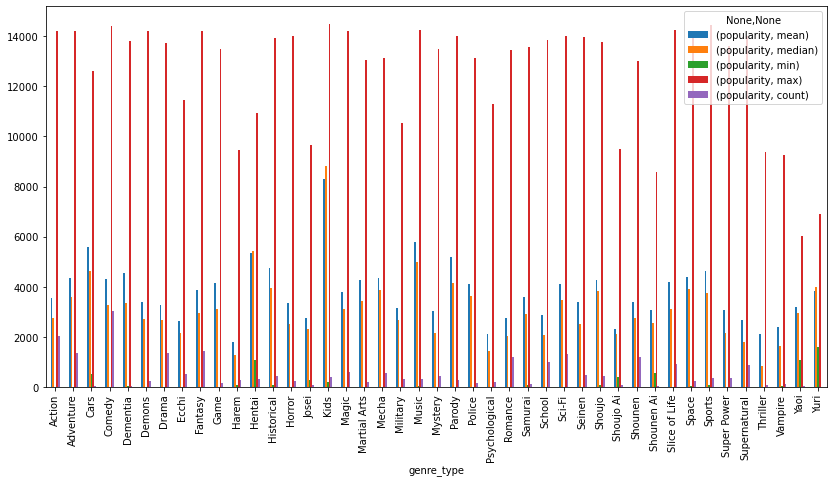

In [45]:
df_genre.groupby('genre_type').agg({'popularity': ['mean', 'median','min', 'max','count']}).plot(kind='bar', figsize=(14,7))

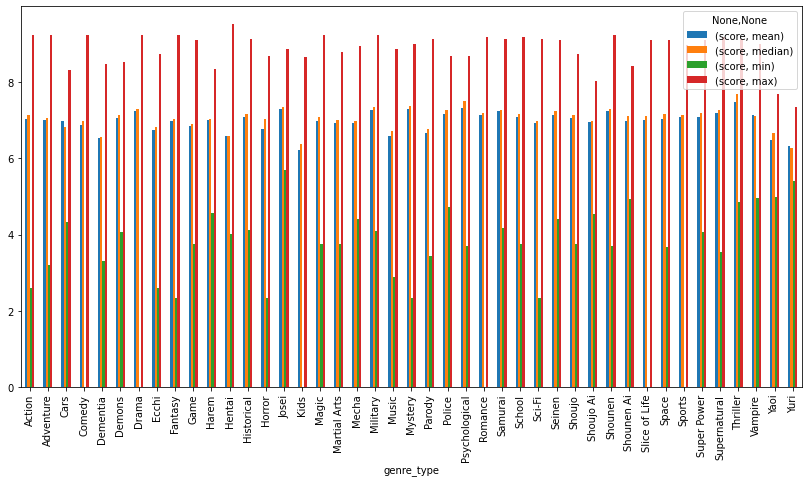

In [46]:
df_genre.groupby('genre_type').agg({'score': ['mean', 'median','min', 'max',]}).plot(kind='bar', figsize=(14,7))

In [47]:
df_genre.groupby('genre_type').agg({'score': ['mean', 'median', 'min', 'max','count', ],'popularity':['mean', 'median', 'min', 'max','count']}).sort_values(by= ('score','mean'), ascending=False)

score                            popularity                \
                   mean median   min   max count         mean  median   min   
genre_type                                                                    
Thriller       7.489241  7.700  4.85  9.15    79  2119.253165   831.0     1   
Psychological  7.326990  7.500  3.71  8.69   206  2126.291262  1449.5     1   
Josei          7.292985  7.360  5.70  8.87    67  2733.268657  2302.0   256   
Mystery        7.287159  7.385  2.33  9.02   454  3035.425110  2162.5     1   
Military       7.276186  7.355  4.10  9.25   312  3169.134615  2658.0     2   
Shounen        7.253257  7.310  3.69  9.25  1182  3405.695431  2754.0     1   
Drama          7.239828  7.290  0.00  9.25  1338  3286.641256  2683.5     2   
Samurai        7.237647  7.285  4.17  9.15   102  3595.705882  2917.5    67   
Supernatural   7.186640  7.280  3.54  9.19   860  2682.545349  1799.0     1   
Police         7.170000  7.280  4.73  8.69   155  4118.283871  3629.0     1   
Seinen         7.153213  7.235  4.41  9.10   470  3376.663830  2522.5     5   
Vampire        7.149100  7.115  4.95  9.02   100  2385.730000  1638.5    44   
Romance        7.134197  7.200  0.00  9.19  1177  2751.149533  2022.0     3   
School         7.099303  7.180  3.76  9.19  1004  2868.967131  2072.0     7   
Super Power    7.098529  7.190  4.08  9.11   367  3081.158038  2145.0     2   
Historical     7.098165  7.170  4.11  9.15   425  4765.054118  3962.0    60   
Sports         7.090710  7.150  0.00  8.99   338  4617.701183  3738.5    85   
Shoujo         7.065318  7.145  3.75  8.74   440  4270.897727  3829.5    69   
Demons         7.059865  7.140  4.08  8.54   223  3385.695067  2697.0    14   
Action         7.048001  7.130  2.61  9.25  2051  3530.675768  2751.0     2   
Space          7.027652  7.180  3.67  9.11   247  4367.489879  3894.0    38   
Adventure      7.023491  7.060  3.21  9.25  1355  4365.971218  3601.0     3   
Slice of Life  7.003797  7.110  0.00  9.10   927  4169.979504  3119.0    13   
Harem          6.999022  7.045  4.56  8.34   276  1785.597826  1279.5    56   
Magic          6.992417  7.085  3.75  9.25   604  3795.903974  3128.0     4   
Shounen Ai     6.987091  7.110  4.94  8.43    55  3064.509091  2557.0   568   
Fantasy        6.981159  7.040  2.33  9.25  1441  3882.546149  2961.0     2   
Cars           6.976585  6.830  4.33  8.33    41  5598.902439  4607.0   511   
Shoujo Ai      6.953036  6.995  4.55  8.03    56  2313.821429  2129.5   380   
Mecha          6.938840  6.980  4.40  8.95   543  4363.014733  3849.0     9   
Sci-Fi         6.936586  6.990  2.33  9.15  1318  4106.714719  3452.5     5   
Martial Arts   6.925751  7.000  3.76  8.79   193  4281.243523  3430.0    10   
Comedy         6.883625  6.990  0.00  9.25  3021  4317.342271  3265.0     4   
Game           6.857679  6.915  3.76  9.10   168  4135.166667  3106.0     3   
Horror         6.780705  7.040  2.33  8.69   227  3350.762115  2509.0     6   
Ecchi          6.748735  6.820  2.61  8.74   506  2637.772727  2152.5    11   
Parody         6.680899  6.770  3.44  9.15   267  5183.917603  4142.0     5   
Music          6.589210  6.730  2.89  8.88   329  5765.167173  4988.0    37   
Hentai         6.580785  6.590  4.02  9.52   331  5327.570997  5433.0  1057   
Dementia       6.530426  6.570  3.31  8.48    47  4549.085106  3350.0    48   
Yaoi           6.482857  6.660  4.99  7.70    28  3195.178571  2966.0  1057   
Yuri           6.320000  6.275  5.41  7.36    10  3836.200000  3980.0  1594   
Kids           6.228030  6.390  0.00  8.66   406  8294.285714  8809.0   214   

                            
                 max count  
genre_type                  
Thriller        9377    79  
Psychological  11302   206  
Josei           9642    67  
Mystery        13486   454  
Military       10539   312  
Shounen        13025  1182  
Drama          13747  1338  
Samurai        13567   102  
Supernatural   14003   860  
Police         13145   155  
Seinen

### Genre
- Thriller genre is highest rated with: Thriller, Psychological/suspense, Mystery being the top three highest rated shows on average


In [48]:
df_genre.groupby('genre_type')['score', 'popularity'].count().sort_values(by= 'score', ascending=False)

<ipython-input-48-483f722b967b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genre.groupby('genre_type')['score', 'popularity'].count().sort_values(by= 'score', ascending=False)


,score,popularity
genre_type,,
Comedy,3021,3021
Action,2051,2051
Fantasy,1441,1441
Adventure,1355,1355
Drama,1338,1338
Sci-Fi,1318,1318
Shounen,1182,1182
Romance,1177,1177
School,1004,1004


In [49]:
genre_heat_map = df_genre

In [50]:
genre_heat_map['0'] = np.where(genre_heat_map['score'] < 0.5 , 1, 0)
genre_heat_map['1'] = np.where(((genre_heat_map['score'] >= 0.5) & (genre_heat_map['score'] < 1.5)), 1, 0)
genre_heat_map['2'] = np.where(((genre_heat_map['score'] >= 1.5) & (genre_heat_map['score'] < 2.5)), 1, 0)
genre_heat_map['3'] = np.where(((genre_heat_map['score'] >= 2.5) & (genre_heat_map['score'] < 3.5)), 1, 0)
genre_heat_map['4'] = np.where(((genre_heat_map['score'] >= 3.5) & (genre_heat_map['score'] < 4.5)), 1, 0)
genre_heat_map['5'] = np.where(((genre_heat_map['score'] >= 4.5) & (genre_heat_map['score'] < 5.5)), 1, 0)
genre_heat_map['6'] = np.where(((genre_heat_map['score'] >= 5.5) & (genre_heat_map['score'] < 6.5)), 1, 0)
genre_heat_map['7'] = np.where(((genre_heat_map['score'] >= 6.5) & (genre_heat_map['score'] < 7.5)), 1, 0)
genre_heat_map['8'] = np.where(((genre_heat_map['score'] >= 7.5) & (genre_heat_map['score'] < 8.5)), 1, 0)
genre_heat_map['9'] = np.where(((genre_heat_map['score'] >= 8.5) & (genre_heat_map['score'] < 9.5)), 1, 0)
genre_heat_map['10'] = np.where(genre_heat_map['score'] >= 9.5, 1, 0)

# genre_heat_map['0'] = np.nan
# genre_heat_map['1'] = np.nan 
# genre_heat_map['2'] = np.nan
# genre_heat_map['3'] = np.nan
# genre_heat_map['4'] = np.nan
# genre_heat_map['5'] = np.nan
# genre_heat_map['6'] = np.nan
# genre_heat_map['7'] = np.nan
# genre_heat_map['8'] = np.nan
# genre_heat_map['9'] = np.nan
# genre_heat_map['10'] = np.nan

In [51]:
genre_heat_map[['genre_type', 'score', '0', '1', '2', '3', '4','5', '6', '7', '8', '9', '10']]

,genre_type,score,0,1,2,3,4,5,6,7,8,9,10
anime_id,,,,,,,,,,,,,
59,Ecchi,7.53,0,0,0,0,0,0,0,0,1,0,0
7817,Ecchi,7.10,0,0,0,0,0,0,0,1,0,0,0
966,Ecchi,7.73,0,0,0,0,0,0,0,0,1,0,0
857,Ecchi,7.64,0,0,0,0,0,0,0,0,1,0,0
6645,Ecchi,6.30,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21653,Mecha,7.11,0,0,0,0,0,0,0,1,0,0,0
35586,Mecha,5.36,0,0,0,0,0,1,0,0,0,0,0
36856,Mecha,5.71,0,0,0,0,0,0,1,0,0,0,0


In [52]:
ghm = genre_heat_map[['genre_type', 'score', '0', '1', '2', '3', '4','5', '6', '7', '8', '9', '10']]
ghm = ghm.set_index('genre_type')
ghm = ghm.drop('score', axis=1)

In [53]:
ghm

,0,1,2,3,4,5,6,7,8,9,10
genre_type,,,,,,,,,,,
Ecchi,0,0,0,0,0,0,0,0,1,0,0
Ecchi,0,0,0,0,0,0,0,1,0,0,0
Ecchi,0,0,0,0,0,0,0,0,1,0,0
Ecchi,0,0,0,0,0,0,0,0,1,0,0
Ecchi,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
Mecha,0,0,0,0,0,0,0,1,0,0,0
Mecha,0,0,0,0,0,1,0,0,0,0,0
Mecha,0,0,0,0,0,0,1,0,0,0,0


In [54]:
ghm2 = ghm.groupby(by='genre_type')['0','1','2','3','4','5','6','7','8','9','10'].sum()

<ipython-input-54-6b2d3ea3e54f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ghm2 = ghm.groupby(by='genre_type')['0','1','2','3','4','5','6','7','8','9','10'].sum()


In [55]:
ghm2

,0,1,2,3,4,5,6,7,8,9,10
genre_type,,,,,,,,,,,
Action,0,0,0,1,7,65,384,1001,554,39,0
Adventure,0,0,0,1,2,37,252,715,328,20,0
Cars,0,0,0,0,1,2,8,15,15,0,0
Comedy,3,1,1,8,50,155,606,1442,707,48,0
Dementia,0,0,0,1,3,5,11,14,13,0,0
Demons,0,0,0,0,2,4,48,93,74,2,0
Drama,1,0,0,0,0,28,197,599,466,47,0
Ecchi,0,0,0,1,2,31,114,297,57,4,0
Fantasy,0,0,1,1,8,52,280,742,334,23,0


## Heatmap with Seaborn


Text(0.5, 1.0, 'Genre ratings heat map')

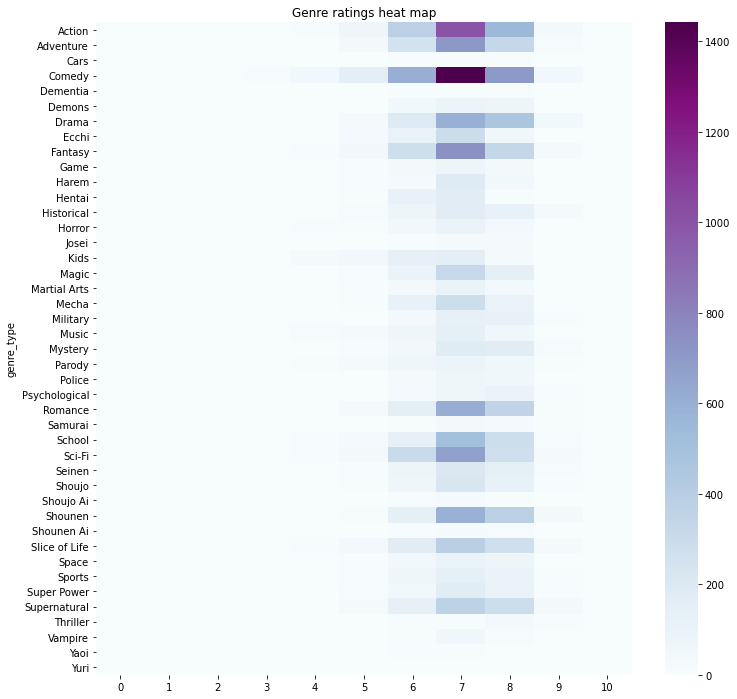

In [56]:
import seaborn as sns
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(ghm2, cmap='BuPu')
r.set_title("Genre ratings heat map")

In [57]:
genre_pop = df_genre.groupby('genre_type').agg({'popularity': 'mean'})

In [58]:
genre_pop

,popularity
genre_type,
Action,3530.675768
Adventure,4365.971218
Cars,5598.902439
Comedy,4317.342271
Dementia,4549.085106
Demons,3385.695067
Drama,3286.641256
Ecchi,2637.772727
Fantasy,3882.546149


Text(0.5, 1.0, 'Genre popularity heat map')

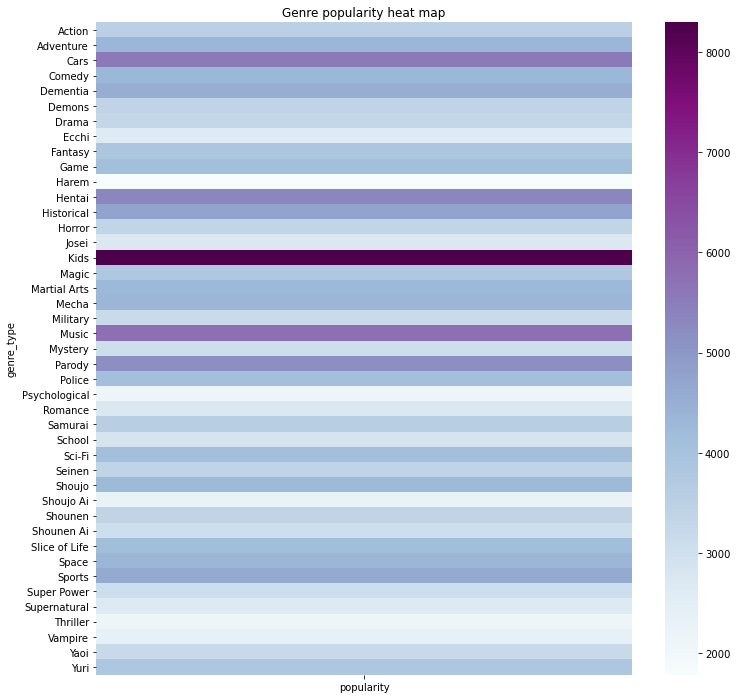

In [59]:
import seaborn as sns
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(genre_pop, cmap='BuPu')
r.set_title("Genre popularity heat map")

In [60]:
anime.popularity.describe()

count     6668.000000
mean      4479.515897
std       3453.338080
min          1.000000
25%       1691.750000
50%       3629.500000
75%       6630.250000
max      14468.000000
Name: popularity, dtype: float64

## User Location

In [61]:
user_country_count = users.groupby('country').agg({'user_id': 'count'})
user_country_count

,user_id
country,
albania,32
algeria,71
andorra,4
angola,8
argentina,584
...,...
uzbekistan,7
venezuela,574
vietnam,136


In [62]:
for_map_data = dict(
        type = 'choropleth',
        colorscale = 'deep',
        locations = user_country_count.index,
        locationmode = "country names",
        z = user_country_count['user_id'],
        text = user_country_count.index,
        colorbar = {'title' : 'Number of Viewers'},
      )

In [63]:
layout = dict(title = 'Anime Viewers Around the World 2019',
              geo = dict(projection = {'type':'equirectangular'})
             )


In [64]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

choromap = go.Figure(data = [for_map_data],layout = layout)
iplot(choromap,validate=False)


In [65]:
users[users['city']=='paris']

,Unnamed: 0,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,city,country
96,96,zeran,154335,25,329,1,11,6,99.544444,Male,Paris,1986-06-24 00:00:00,NaN,2009-02-27 00:00:00,2012-05-31 10:37:00,7.22,0.0,5850,paris,united states
116,116,jack-Beam,3773775,75,202,0,10,27,55.670139,Male,Paris,1997-12-11 00:00:00,NaN,2014-05-13 00:00:00,2018-05-16 19:39:05,9.00,0.0,3547,paris,united states
122,122,Leyzou,329865,20,411,32,24,136,126.312153,Male,Paris,1994-08-20 00:00:00,NaN,2010-05-17 00:00:00,2018-01-21 00:54:39,7.67,3.0,7952,paris,united states
789,789,Tof,169178,30,248,34,19,68,77.287500,Male,"Paris, France :(",1987-03-15 00:00:00,NaN,2009-04-11 00:00:00,2010-02-13 01:14:00,8.07,0.0,4540,paris,united states
1073,1073,White_Elysion,3292213,36,194,19,6,30,43.225694,Female,Paris,1998-10-21 00:00:00,NaN,2013-10-25 00:00:00,2018-04-26 11:05:39,7.02,6.0,2534,paris,united states
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104350,104350,Wood3Nz,6210762,16,205,0,4,220,90.859722,Male,Paris,1997-11-16 00:00:00,NaN,2017-04-27 00:00:00,2018-05-24 17:23:07,7.93,0.0,5550,paris,united states
105880,105880,Laindesu,4775526,9,83,4,6,15,39.093056,Male,Paris,2001-03-06 00:00:00,NaN,2015-07-28 00:00:00,2016-12-04 08:39:00,8.18,0.0,2362,paris,united states
106293,106293,Yurisu,5422521,76,307,0,5,370,82.395139,Male,Kyôtô or Paris,1999-01-23 00:00:00,NaN,2016-05-21 00:00:00,2018-05-25 00:02:44,8.76,61.0,5183,paris,united states
106667,106667,Swipee,5832119,5,104,10,10,21,51.772917,Male,Paris,2001-03-17 00:00:00,NaN,2016-11-11 00:00:00,2018-05-17 18:21:13,7.27,1.0,3158,paris,united states


In [66]:
users = users.drop(['Unnamed: 0', 'access_rank','join_date','last_online','user_plantowatch'], axis=1)
import datetime as DT

now = pd.Timestamp('now')

users['birth_date'] = pd.to_datetime(users['birth_date'], format='%Y-%m-%d %H:%M:%S') 

users['birth_date'] = users['birth_date'].where(users['birth_date'] < now, users['birth_date'] -  np.timedelta64(100, 'Y')) 
users['age'] = (now - users['birth_date']).astype('<m8[Y]')    

for i in users.index:
    if users['age'][i] < 20:
        users.loc[i,'age_range'] = 'under20'
    elif users['age'][i] >= 20 and users['age'][i] < 25:
        users.loc[i,'age_range'] = '20-24'
    elif users['age'][i] >= 25 and users['age'][i] < 30:
        users.loc[i,'age_range'] = '25-29'
    elif users['age'][i] >= 30 and users['age'][i] < 35:
        users.loc[i,'age_range'] = '30-34'
    else:
        users.loc[i,'age_range'] = '35up'

In [67]:
user_AL_join = pd.merge(users, AL, on='username')

In [68]:
user_AL_join

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_days_spent_watching,gender,location,birth_date,stats_mean_score,stats_rewatched,stats_episodes,city,country,age,age_range,anime_id,my_watched_episodes,my_score
0,karthiga,2255153,3,49,1,0,55.091667,Female,"Chennai, India",1990-04-29,7.43,0.0,3391,NaN,india,30.0,30-34,21,586,9
1,karthiga,2255153,3,49,1,0,55.091667,Female,"Chennai, India",1990-04-29,7.43,0.0,3391,NaN,india,30.0,30-34,59,26,7
2,karthiga,2255153,3,49,1,0,55.091667,Female,"Chennai, India",1990-04-29,7.43,0.0,3391,NaN,india,30.0,30-34,74,26,7
3,karthiga,2255153,3,49,1,0,55.091667,Female,"Chennai, India",1990-04-29,7.43,0.0,3391,NaN,india,30.0,30-34,120,26,7
4,karthiga,2255153,3,49,1,0,55.091667,Female,"Chennai, India",1990-04-29,7.43,0.0,3391,NaN,india,30.0,30-34,178,26,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31284025,HMicca,1289601,11,73,2,2,64.431250,Female,"Birmingham, England",1995-08-12,8.89,11.0,3822,birmingham,united states,25.0,25-29,9441,13,9
31284026,HMicca,1289601,11,73,2,2,64.431250,Female,"Birmingham, England",1995-08-12,8.89,11.0,3822,birmingham,united states,25.0,25-29,12461,11,9
31284027,HMicca,1289601,11,73,2,2,64.431250,Female,"Birmingham, England",1995-08-12,8.89,11.0,3822,birmingham,united states,25.0,25-29,5671,25,7
31284028,HMicca,1289601,11,73,2,2,64.431250,Female,"Birmingham, England",1995-08-12,8.89,11.0,3822,birmingham,united states,25.0,25-29,521,52,8


In [69]:
anime

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,Demons,Game,Sci-Fi,Shounen,Seinen,Horror,Cars,Kids,Mystery,Mecha
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,0,0,0,1,0,0,0,0,0,0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,0,0,0,1,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,0,0,0,0,0,0,0,0,0,0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,0,0,0,0,0,0,0,0,0,0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,37405,Dokidoki Little Ooyasan,NaN,dokidokiりとる大家さん,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,0,Currently Airing,...,0,0,0,0,0,0,0,0,0,0
6664,37886,Wo Shi Jiang Xiaobai (2018),I&#039;m Joybo OVA,我是江小白 小剧场,Wo Shi Jiang Xiao Bai: Xiao Ju Chang,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,1,Finished Airing,...,0,0,0,0,0,0,0,0,0,0
6665,37255,Genki Genki Non-tan: Obake Mura Meiro,NaN,げんきげんきノンタン おばけむらめいろ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,1,Finished Airing,...,0,0,0,0,0,0,0,1,0,0
6666,35229,Mr. Men Little Miss,Mr. Men Little Miss,Mr. Men Little Miss / ミスターメン リトルミス,NaN,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Picture book,0,Currently Airing,...,0,0,0,0,0,0,0,1,0,0


In [70]:
users_anime_join = pd.merge(user_AL_join, anime, on='anime_id')

In [71]:
users_anime_join

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_days_spent_watching,gender,location,birth_date,...,Demons,Game,Sci-Fi,Shounen,Seinen,Horror,Cars,Kids,Mystery,Mecha
0,karthiga,2255153,3,49,1,0,55.091667,Female,"Chennai, India",1990-04-29,...,0,0,0,1,0,0,0,0,0,0
1,Damonashu,37326,45,195,27,25,82.574306,Male,"Detroit,Michigan",1991-08-01,...,0,0,0,1,0,0,0,0,0,0
2,bskai,228342,25,414,2,5,159.483333,Male,"Nayarit, Mexico",1990-12-14,...,0,0,0,1,0,0,0,0,0,0
3,Slimak,61677,79,224,0,3,124.731944,Male,Poland,1988-02-21,...,0,0,0,1,0,0,0,0,0,0
4,MistButterfly,2485327,66,3923,115,0,608.234514,Female,~ Hungary ~,1992-01-16,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31284025,mustapha_el12,5726978,9,129,14,0,56.238889,Male,Salé,1993-06-10,...,0,0,0,0,0,0,0,0,0,0
31284026,animekanji,2707659,156,619,0,0,228.643056,Male,"Ipswich, Suffolk",1994-06-03,...,0,0,0,0,0,0,0,0,0,0
31284027,AnimeKhor,4779870,60,1637,1154,16,370.466771,Male,"Babol, Iran",1998-03-27,...,0,0,0,0,0,0,0,0,0,0
31284028,animekanji,2707659,156,619,0,0,228.643056,Male,"Ipswich, Suffolk",1994-06-03,...,0,0,0,0,0,0,0,0,0,0


In [72]:
users_anime_join = users_anime_join.drop(['title_english', 'title_japanese','title_synonyms','image_url'], axis=1)


In [73]:
anime_Age = users_anime_join[['anime_id','age_range']].copy()

In [74]:
anime_Age

,anime_id,age_range
0,21,30-34
1,21,25-29
2,21,25-29
3,21,30-34
4,21,25-29
...,...,...
31284025,37755,25-29
31284026,37895,25-29
31284027,37895,20-24
31284028,37896,25-29


In [75]:
df3

,genre_type
anime_id,
59,Ecchi
7817,Ecchi
966,Ecchi
857,Ecchi
6645,Ecchi
...,...
21653,Mecha
35586,Mecha
36856,Mecha


In [76]:
testdf = pd.merge(anime_Age, df3, on='anime_id')
testdf

,anime_id,age_range,genre_type
0,21,30-34,Fantasy
1,21,30-34,Action
2,21,30-34,Drama
3,21,30-34,Adventure
4,21,30-34,Super Power
...,...,...,...
139515411,37755,25-29,Comedy
139515412,37895,25-29,Fantasy
139515413,37895,20-24,Fantasy
139515414,37896,25-29,Fantasy


In [77]:
genre_type_S = testdf['genre_type'].unique()
AG_HT = pd.DataFrame(data = 0, columns = ['under20','20-24','25-29','30-34','35up'], index = genre_type_S)

In [78]:
testdf.groupby(['age_range','genre_type'])['genre_type'].count()

#testdf = testdf.pivot('age_range', 'genre_type', gpGenre)
#sns.heatmap()

age_range  genre_type  
20-24      Action          3430013
           Adventure       1560571
           Cars              18099
           Comedy          4178385
           Dementia          88177
                            ...   
under20    Supernatural     238756
           Thriller          34931
           Vampire           28219
           Yaoi               2423
           Yuri                553
Name: genre_type, Length: 215, dtype: int64

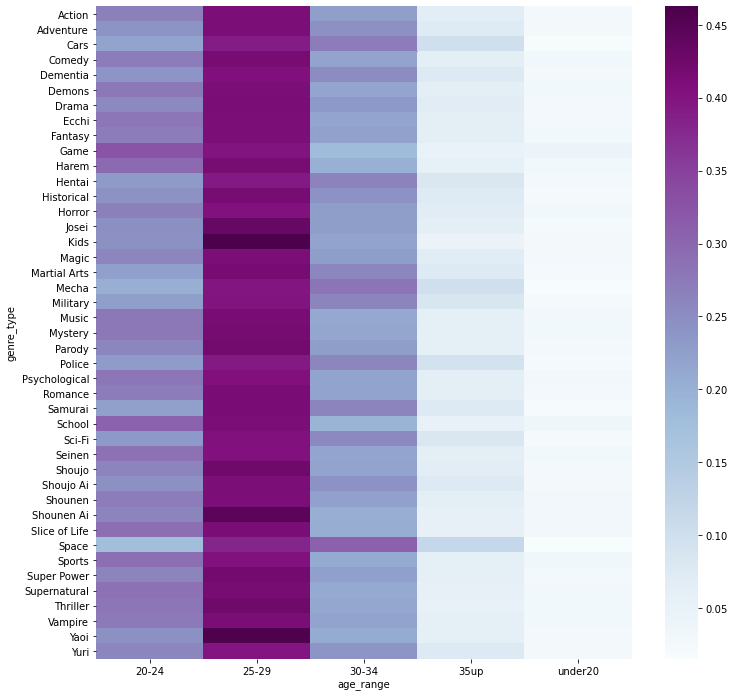

In [91]:
#Normalized across genres
AG_HT = pd.crosstab(testdf.genre_type, testdf.age_range, normalize=0)
fig = plt.figure(figsize=(12,12))
sns.heatmap(AG_HT, cmap='BuPu')

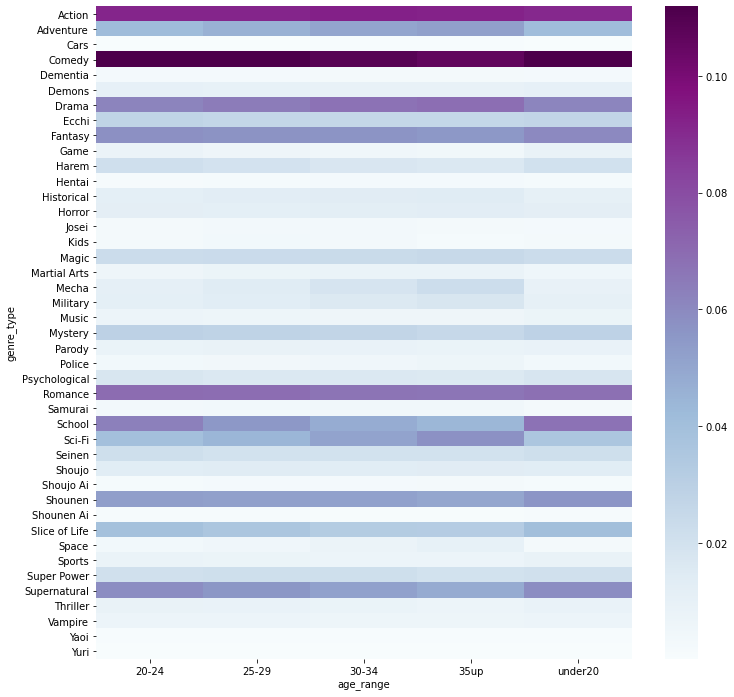

In [92]:
#Normalized across age ranges
AG_HT = pd.crosstab(testdf.genre_type, testdf.age_range, normalize=1)
fig = plt.figure(figsize=(12,12))
sns.heatmap(AG_HT, cmap='BuPu')

In [82]:
users_anime_join = users_anime_join[users_anime_join.episodes != 0]

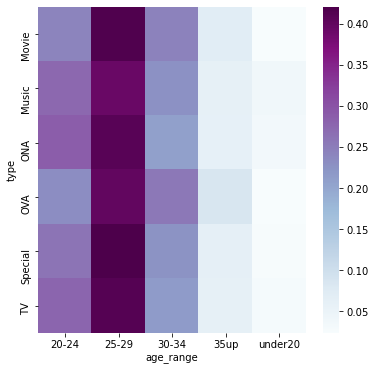

In [84]:
typeVage_HT = pd.crosstab(users_anime_join.type, users_anime_join.age_range, normalize=0)
fig = plt.figure(figsize=(6,6))
sns.heatmap(typeVage_HT, cmap='BuPu')

In [85]:
list(anime)

['anime_id',
 'title',
 'title_english',
 'title_japanese',
 'title_synonyms',
 'image_url',
 'type',
 'source',
 'episodes',
 'status',
 'airing',
 'aired_string',
 'aired',
 'duration',
 'rating',
 'score',
 'scored_by',
 'rank',
 'popularity',
 'members',
 'favorites',
 'background',
 'premiered',
 'broadcast',
 'related',
 'producer',
 'licensor',
 'studio',
 'genre',
 'opening_theme',
 'ending_theme',
 'duration_min',
 'aired_from_year',
 'Ecchi',
 'Police',
 'Shoujo Ai',
 'Josei',
 'Fantasy',
 'Action',
 'Martial Arts',
 'Military',
 'Slice of Life',
 'Harem',
 'Music',
 'Drama',
 'Hentai',
 'Yaoi',
 'Supernatural',
 'Thriller',
 'Romance',
 'Shoujo',
 'Parody',
 'Adventure',
 'Magic',
 'Psychological',
 'School',
 'Samurai',
 'Historical',
 'Sports',
 'Vampire',
 'Yuri',
 'Super Power',
 'Space',
 'Comedy',
 'Shounen Ai',
 'Dementia',
 'Demons',
 'Game',
 'Sci-Fi',
 'Shounen',
 'Seinen',
 'Horror',
 'Cars',
 'Kids',
 'Mystery',
 'Mecha']

In [86]:
anime.groupby(['duration_min'])['duration_min'].count()


duration_min
0.000000      47
0.200000       1
0.233333       1
0.250000       8
0.266667       1
              ..
150.000000     2
151.000000     1
160.000000     1
162.000000     1
163.000000     1
Name: duration_min, Length: 175, dtype: int64

In [94]:
for i in users_anime_join.index:
    if users_anime_join['duration_min'][i] < 11.0:
        users_anime_join.loc[i,'duration_min_B'] = '<10min'
    elif users_anime_join['duration_min'][i] >= 11.0 and users_anime_join['duration_min'][i] < 24.0:
        users_anime_join.loc[i,'duration_min_B'] = '10min to <24 min'
    elif users_anime_join['duration_min'][i] == 24.0:
        users_anime_join.loc[i,'duration_min_B'] = '24min'
    elif users_anime_join['duration_min'][i] > 24.0 and users_anime_join['duration_min'][i] < 60.0:
        users_anime_join.loc[i,'duration_min_B'] = '>24min to <60 min'
    else:
        users_anime_join.loc[i,'duration_min_B'] = '>60min'

KeyboardInterrupt: 

In [87]:
users_anime_join = users_anime_join[users_anime_join.duration_min >=1]

In [ ]:
users_anime_join

In [ ]:
ageVduration_HT = pd.crosstab(users_anime_join.duration_min_B, users_anime_join.age_range, normalize=0)
fig = plt.figure(figsize=(6,6))
sns.heatmap(ageVduration_HT, cmap='BuPu')